# Fase 4  - Tech Challenge - Pós Tech Data Analytics

## Aluna: Bianca Tavares dos Santos

## • Etapa 1️⃣ - Preparando libs & dataframe



### *1.1* Import Libs, Upload de arquivo e *Criação* do DF

Resumo: Importando todas as libs para criaçao do projeto

In [1]:
#Recurso de abertura do arquivo Obesity.csv
#from google.colab import files

# Importação de bibliotecas essenciais para manipulação e análise de dados
import pandas as pd
import numpy as np
import os

# Importação de bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de bibliotecas para pré-processamento e machine learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, roc_curve, auc, f1_score 
from sklearn.feature_selection import mutual_info_classif
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

import joblib
import streamlit as st

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
####Upload Google Colab
# uploaded = files.upload()

# # Upload de apenas um arquivo
# for filename in uploaded.keys():

def load_data(path='c:/Users/bianca.santos/Documents/obesity-project/Obesity.csv'):
    df = pd.read_csv(path)
    print(f'Arquivo \"{path}\" enviado com sucesso.')
    return df

In [3]:
df = load_data()
print("DataFrame criado com sucesso!")

Arquivo "c:/Users/bianca.santos/Documents/obesity-project/Obesity.csv" enviado com sucesso.
DataFrame criado com sucesso!


In [4]:
print(df.head())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe

## • Etapa 2️⃣ - Análise do Dataframe - base de dados Obesity.csv

### *2.1* Conhecendo o dataframe

Resumo: Compreendendo formato de dados das colunas do df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

### *2.2* ADE Análise descritiva e exploratória


Resumo: Seção dedicada a compreender a estrutura dos dados disponíveis no DataFrame. 
Serão analisados o tipo de dado de cada coluna, a presença de valores ausentes, estatísticas descritivas para colunas numéricas e a distribuição de valores em variáveis categóricas.


In [6]:
# Análise descritiva para colunas numéricas
display(df.describe())

# Análise descritiva para colunas categóricas
for column in df.select_dtypes(include='object').columns:
    print(f"\nContagem de valores para a coluna: {column}")
    display(df[column].value_counts())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000



Contagem de valores para a coluna: Gender


Gender
Male      1068
Female    1043
Name: count, dtype: int64


Contagem de valores para a coluna: family_history


family_history
yes    1726
no      385
Name: count, dtype: int64


Contagem de valores para a coluna: FAVC


FAVC
yes    1866
no      245
Name: count, dtype: int64


Contagem de valores para a coluna: CAEC


CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


Contagem de valores para a coluna: SMOKE


SMOKE
no     2067
yes      44
Name: count, dtype: int64


Contagem de valores para a coluna: SCC


SCC
no     2015
yes      96
Name: count, dtype: int64


Contagem de valores para a coluna: CALC


CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


Contagem de valores para a coluna: MTRANS


MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


Contagem de valores para a coluna: Obesity


Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

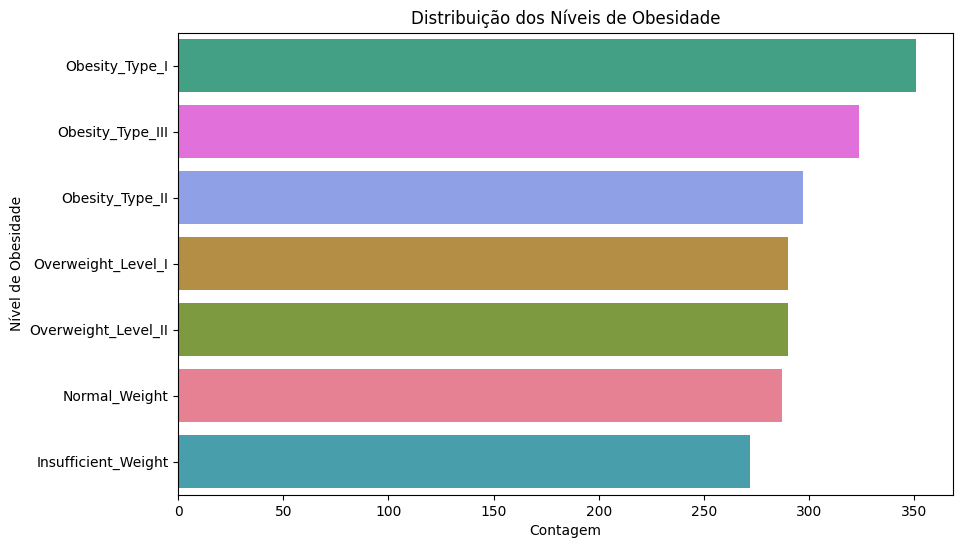

In [7]:
# Distribuição da variável alvo 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Obesity', order=df['Obesity'].value_counts().index, palette='husl', hue='Obesity', legend=False)
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Contagem')
plt.ylabel('Nível de Obesidade')
plt.show()

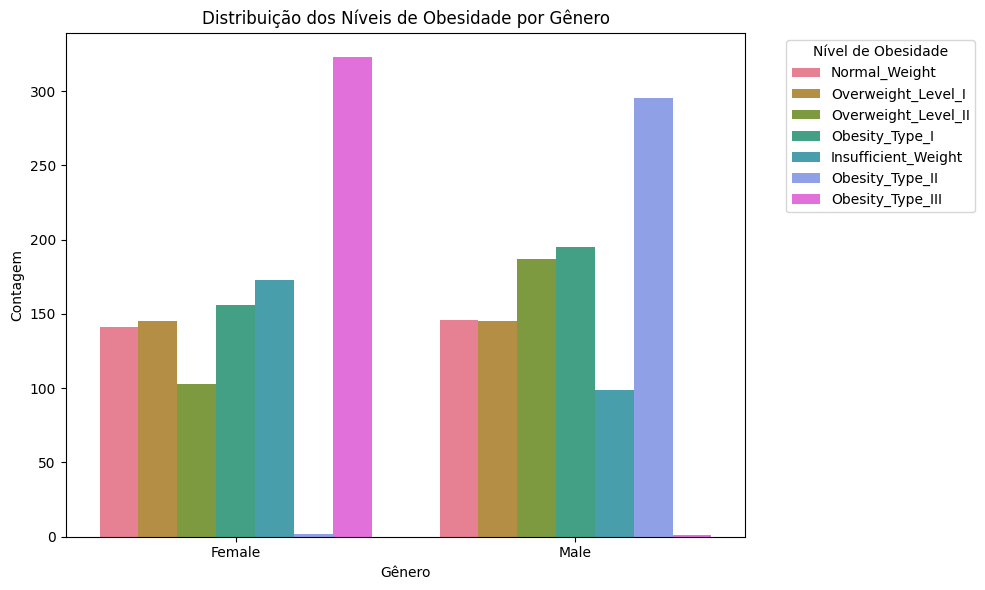

In [8]:
# Relação entre 'Gender' e 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Obesity', palette='husl')
plt.title('Distribuição dos Níveis de Obesidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

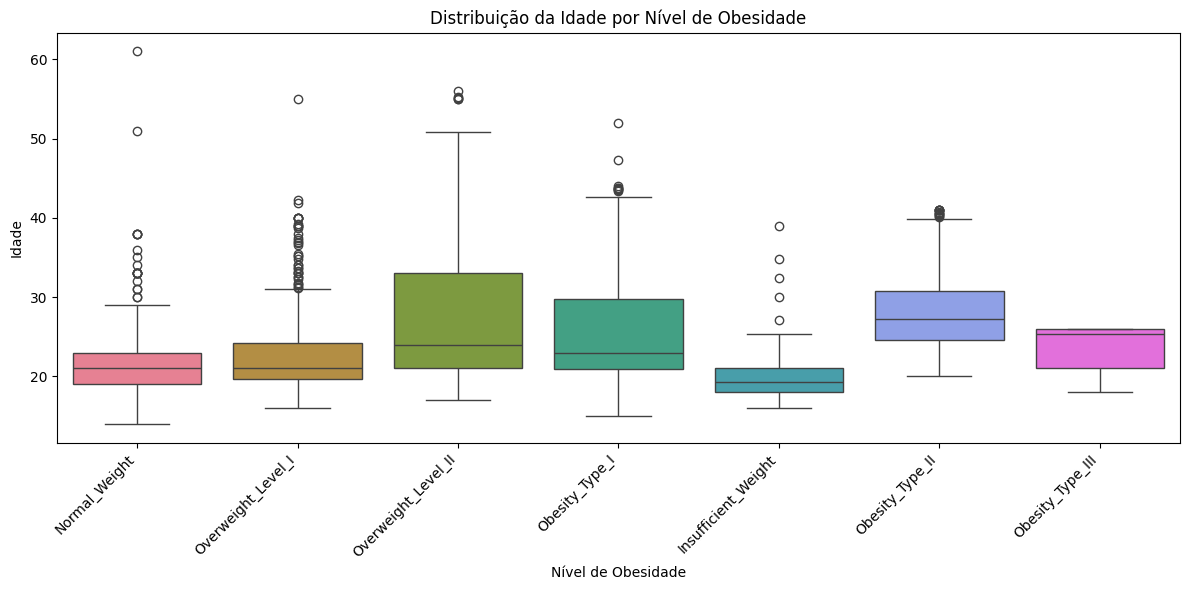

In [9]:
# Distribuição de 'Age' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Age', palette='husl', hue='Obesity', legend=False)
plt.title('Distribuição da Idade por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

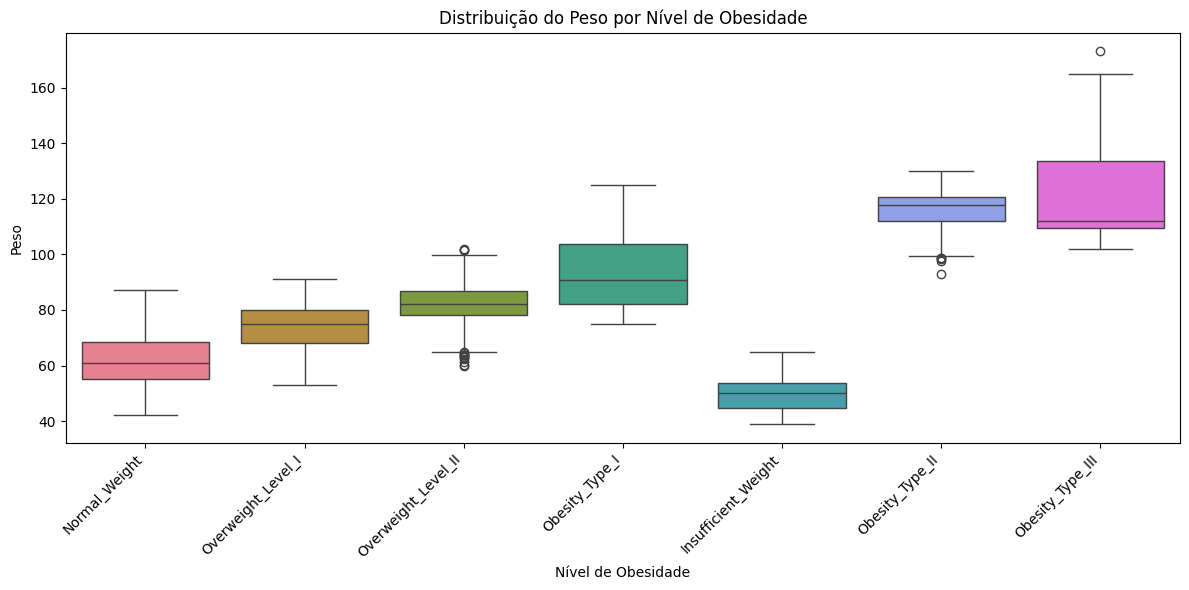

In [10]:
# Distribuição de 'Weight' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Weight', palette='husl', hue='Obesity', legend=False)
plt.title('Distribuição do Peso por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Peso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

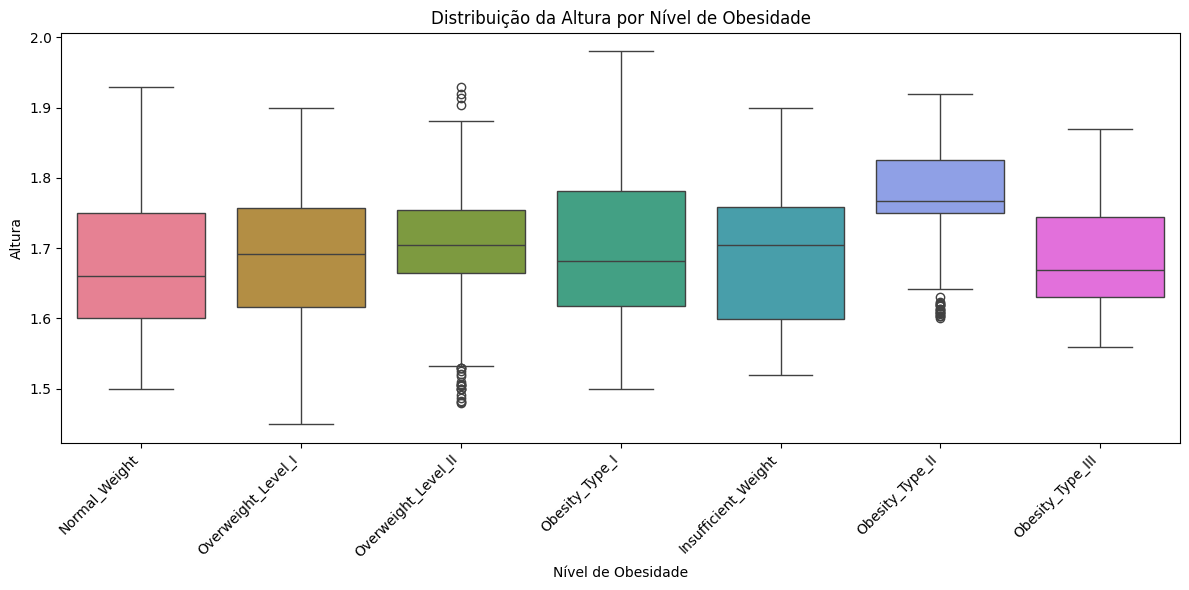

In [11]:
# Distribuição de 'Height' por nível de 'Obesity'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Obesity', y='Height', palette='husl', hue='Obesity', legend=False)
plt.title('Distribuição da Altura por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Altura')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

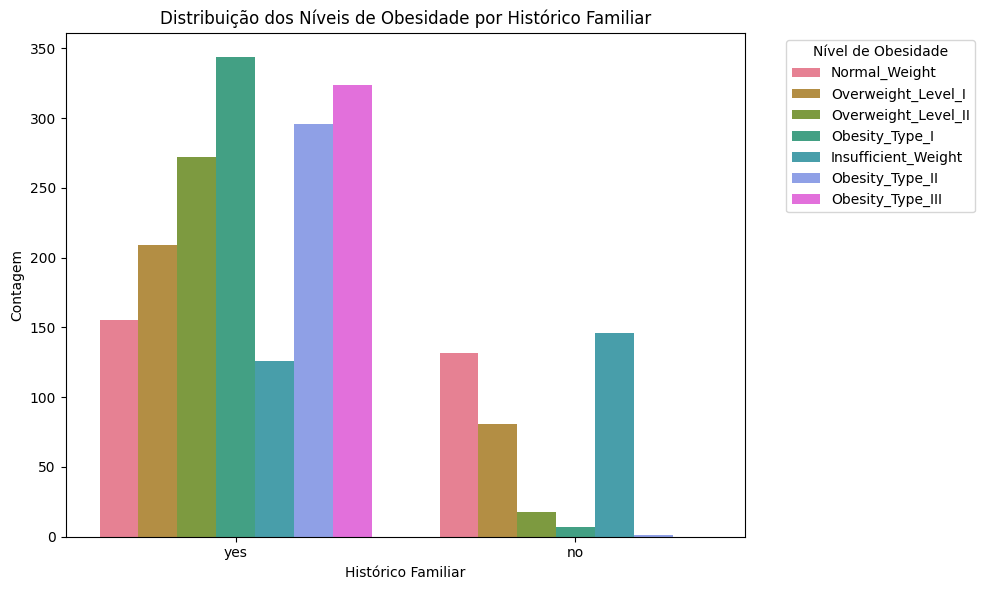

In [12]:
# Relação entre 'family_history' e 'Obesity'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_history', hue='Obesity', palette='husl')
plt.title('Distribuição dos Níveis de Obesidade por Histórico Familiar')
plt.xlabel('Histórico Familiar')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### *2.3* Resumo analítico



----------------------------
#### Características

----------------------------

Geral: Base se dados contendo variáveis relacionadas ao perfil pessoal e comportamentamental

📌 Variavés numéricas: Age, Height, Weight, FAF, TUE, CH2O

📌 Categóricas: Gender, family_history, FAVC (fast food), SCC (monitoramento calórico), CAEC (comer entre refeições), CALC (álcool), SMOKE, MTRANS (transporte)

🎯 Variável Traget: Obesity

----------------------------
####  Distribuição da variável alvo Obesity

----------------------------

A visualização mostra desequilíbrio entre classes

Classes mais frequentes: Overweight_Level_I e Obesity_Type_I, sugerindo prevalência de sobrepeso/obesidade na amostra

Classes menos frequentes (ex: Insufficient_Weight) podem demandar estratégias de balanceamento em modelagem

----------------------------
####  Relações com Obesity

----------------------------
- *_Gender_:* 
Ambos os sexos estão representados em todos os níveis de obesidade.

Pode haver diferença sutil, mas não é determinante isolado.

- *_Age_:* 

Distribuição ligeiramente crescente da idade com níveis mais altos de obesidade. Idade média tende a subir à medida que os níveis de obesidade aumentam.

- *_Weight_:* 

Claro aumento do peso médio com os níveis de obesidade. Peso é o preditor mais diretamente correlacionado com a classe alvo.

- *_Height_:*

Altura apresenta variação menor entre os grupos de obesidade. Não é um bom discriminador por si só — útil apenas em conjunto com o peso (IMC).

- *_family_history_:*

Indivíduos com histórico familiar de obesidade tendem a estar em níveis mais altos de obesidade.
Forte candidato a ser incluído em um score de risco genético.

## • Etapa 3️⃣ - Separando a variável target

In [13]:
# Separando variável alvo
y = df['Obesity']

# Separando vars preditoras e codificando as variáveis categóricas
X = df.drop(columns='Obesity')
X = pd.get_dummies(X, drop_first=True)

# execução de calculo mútuo (variavel que será analisada)
mi = mutual_info_classif(X, y)

# viisualizacao em series
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False)

Weight                          1.254577
Age                             0.592398
Height                          0.429593
FCVC                            0.391736
FAF                             0.302020
CH2O                            0.297236
TUE                             0.285022
NCP                             0.255652
Gender_Male                     0.191412
family_history_yes              0.141614
CAEC_Sometimes                  0.138504
CAEC_Frequently                 0.096659
CALC_Sometimes                  0.096156
MTRANS_Public_Transportation    0.071698
FAVC_yes                        0.068702
CALC_no                         0.064504
CAEC_no                         0.035195
CALC_Frequently                 0.029600
MTRANS_Walking                  0.026804
SCC_yes                         0.025211
MTRANS_Motorbike                0.008269
SMOKE_yes                       0.000000
MTRANS_Bike                     0.000000
dtype: float64

## • Etapa 4️⃣ - Análise de correlação e de importância das variáveis 


In [14]:
df_encoded = df.copy()

# Lista para guardar os dados do glossário
glossario_lista = []

# Loop pelas colunas categóricas e codificação
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    # Adiciona os pares (coluna, original, codificado) à lista
    glossario_lista.extend([
        {'Coluna': col, 'Valor Original': original, 'Valor Codificado': codificado}
        for original, codificado in zip(le.classes_, le.transform(le.classes_))
    ])

# Converte em DataFrame e exibe como tabela
glossario_df = pd.DataFrame(glossario_lista)
display(glossario_df)  # Em Jupyter / Colab
# Ou use:
# print(glossario_df.to_string(index=False))  # Em terminal tradicional


,Coluna,Valor Original,Valor Codificado
0,Gender,Female,0
1,Gender,Male,1
2,family_history,no,0
3,family_history,yes,1
4,FAVC,no,0
5,FAVC,yes,1
6,CAEC,Always,0
7,CAEC,Frequently,1
8,CAEC,Sometimes,2
9,CAEC,no,3


In [15]:
df_encoded = df.copy()

# Dicionário de mapeamento personalizado
mapa_mtrans = {
    'Automobile': 0,
    'Motorcycle': 0,
    'Public_Transportation': 1,
    'Walking': 2,
    'Bike': 2
}

# Aplica o mapeamento na coluna MTRANS
df_encoded['MTRANS'] = df_encoded['MTRANS'].map(mapa_mtrans)

# Gerar glossário como DataFrame
glossario_mtrans_df = pd.DataFrame([
    {'Valor Original': k, 'Valor Codificado': v}
    for k, v in mapa_mtrans.items()
])
glossario_mtrans_df['Coluna'] = 'MTRANS'

# Reorganizar colunas para exibição
glossario_mtrans_df = glossario_mtrans_df[['Coluna', 'Valor Original', 'Valor Codificado']]

# Exibe como tabela (em notebook)
display(glossario_mtrans_df)

# Se estiver fora de notebook, use:
# print(glossario_mtrans_df.to_string(index=False))


,Coluna,Valor Original,Valor Codificado
0,MTRANS,Automobile,0
1,MTRANS,Motorcycle,0
2,MTRANS,Public_Transportation,1
3,MTRANS,Walking,2
4,MTRANS,Bike,2


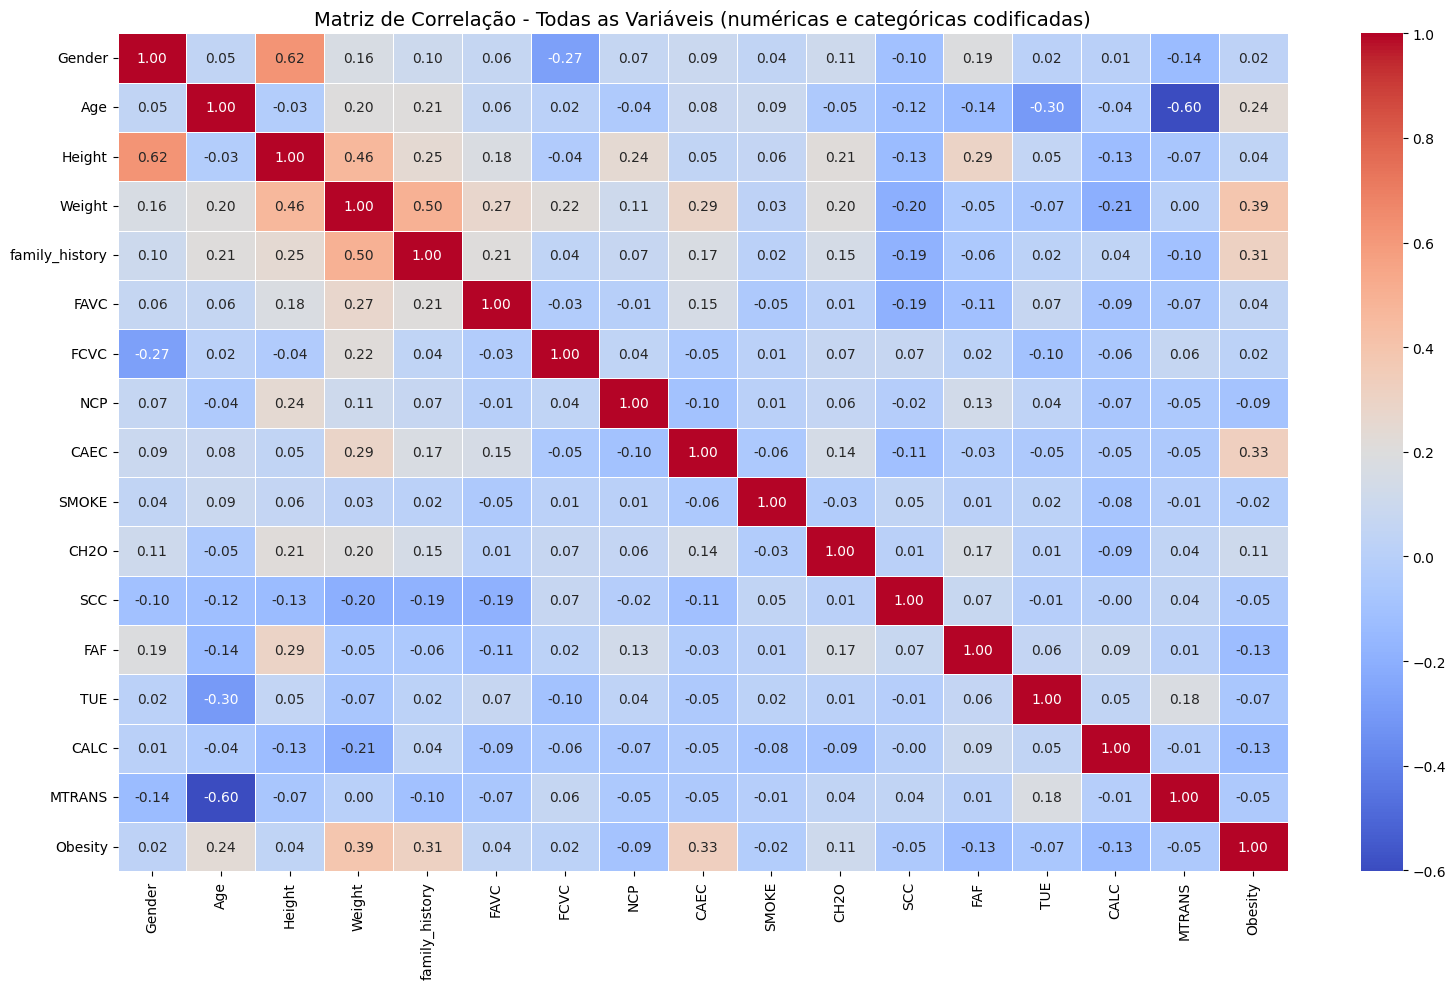

In [16]:
df_encoded = df.copy()

# Codifica colunas categóricas com LabelEncoder
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Matriz de correlação com todas as variáveis já codificadas
corr_matrix = df_encoded.corr()    

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação - Todas as Variáveis (numéricas e categóricas codificadas)", fontsize=14)
plt.tight_layout()
plt.show()

## • Etapa 5️⃣ - Featuring Engenering

In [17]:
df_encoded = df.copy()


def carregar_dados(caminho_csv):
    if not os.path.exists(caminho_csv):
        raise FileNotFoundError("Arquivo CSV não encontrado.")

    df_encoded = pd.read_csv(caminho_csv)

    # Renomeia colunas se necessário
    df_encoded.rename(columns={
        'family_history': 'family_history_with_overweight',
        'Obesity': 'NObeyesdad'
    }, inplace=True)

    return df_encoded

In [18]:
# === Função: Pré-processamento e engenharia de features ===
def preprocessar_dados(df):
    # Padroniza strings
    for col in ['Gender', 'FAVC', 'CAEC', 'CALC', 'MTRANS', 'family_history_with_overweight']:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # Mapeamentos
    map_gender = {'male': 1, 'female': 0}
    map_favc = {'yes': 1, 'no': 0}
    map_caec_calc = {'no': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
    map_mtrans = {
        'walking': 0,
        'bike': 0,
        'motorbike': 1,
        'automobile': 2,
        'public_transportation': 3
    }
    map_family = {'yes': 1, 'no': 0}

    # Aplica mapeamentos com replace e validação
    df['Gender'] = df['Gender'].replace(map_gender)
    df['FAVC'] = df['FAVC'].replace(map_favc)
    df['CAEC'] = df['CAEC'].replace(map_caec_calc)
    df['CALC'] = df['CALC'].replace(map_caec_calc)
    df['MTRANS'] = df['MTRANS'].replace(map_mtrans)
    df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(map_family)

    # Verifica se restaram NaNs após o mapeamento
    campos = ['Gender', 'FAVC', 'CAEC', 'CALC', 'MTRANS', 'family_history_with_overweight']
    for campo in campos:
        if df[campo].isna().any():
            raise ValueError(f"Valores inválidos encontrados na coluna '{campo}' após o mapeamento. Revise os dados.")

    # Codifica target
    le_target = LabelEncoder()
    df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'].astype(str).str.strip())

    # Remove registros com valores faltantes em campos numéricos
    df.dropna(subset=['Height', 'Weight', 'Age', 'FAF', 'TUE', 'NObeyesdad'], inplace=True)

    # Cria features
    df['IMC'] = df['Weight'] / (df['Height'] ** 2)
    df['score_comport'] = (
        (df['FAVC'] == 1).astype(int) +
        (df['CAEC'] >= 2).astype(int) +
        (df['CALC'] >= 2).astype(int)
    )

    df['score_sedent'] = (
        (df['FAF'] < 1).astype(int) +
        (df['TUE'] < 1).astype(int) +
        (df['MTRANS'].isin([1, 2])).astype(int)
    )

    df['risco_social'] = (
        (df['family_history_with_overweight'] == 1).astype(int) +
        (df['Gender'] == 1).astype(int) +
        (df['Age'] > 40).astype(int)
    )

    return df, le_target

## • Etapa 6️⃣ - Estruturação ML



📘 Análise Comparativa de Modelos de Classificação

Este script avalia e compara múltiplos algoritmos de Machine Learning para classificação multiclasse
utilizando a métrica AUC (Área sob a Curva ROC). A avaliação é feita com validação cruzada para maior robustez.

Inclui:
- Cálculo de AUC média
- Cálculo de desvio padrão da AUC
- Ranqueamento por performance e estabilidade
- Score final para ajudar na escolha do modelo ideal

In [20]:
# === Função: Treinamento e avaliação dos modelos ===
def treinar_modelos(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )

    modelos = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "RandomForest": RandomForestClassifier(random_state=42),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=300, random_state=42)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    resultados = {
        nome: cross_val_score(modelo, X_train, y_train, cv=cv, scoring='f1_macro').mean()
        for nome, modelo in modelos.items()
    }

    melhor_nome = max(resultados, key=resultados.get)
    melhor_modelo = modelos[melhor_nome].fit(X_train, y_train)
    y_pred = melhor_modelo.predict(X_test)

    print(f"Melhor modelo: {melhor_nome} - F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return melhor_modelo, scaler, melhor_nome

In [21]:
# === Execução principal ===
if __name__ == "__main__":
    # Função que você deve já ter no código
    df = carregar_dados("Obesity.csv")
    df, le_target = preprocessar_dados(df)

    # Features e target
    X = df[['IMC', 'score_comport', 'score_sedent', 'risco_social']]
    y = df['NObeyesdad']

    # Treina e retorna modelo + scaler + nome do modelo
    modelo, scaler, nome_modelo = treinar_modelos(X, y)

C:\Users\bianca.santos\AppData\Local\Temp\ipykernel_19556\67568552.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(map_gender)
C:\Users\bianca.santos\AppData\Local\Temp\ipykernel_19556\67568552.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace(map_favc)
C:\Users\bianca.santos\AppData\Local\Temp\ipykernel_19556\67568552.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

Melhor modelo: RandomForest - F1 Score: 0.9739
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.95      0.96        58
           2       0.97      0.99      0.98        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.92      0.97      0.94        58
           6       0.98      0.95      0.96        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

[[54  0  0  0  0  0  0]
 [ 0 55  0  0  0  3  0]
 [ 0  0 69  1  0  0  0]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  1  0  0  0 56  1]
 [ 0  0  1  0  0  2 55]]


## • Etapa 7️⃣ - Configurando ambiente para deploy

In [22]:
    # Salva o modelo e o scaler juntos
    joblib.dump((modelo, scaler), "modelo_obesidade_final.pkl")

    # Salva as classes do label encoder
    joblib.dump(le_target.classes_, "labels_obesidade.npy")

    # (NOVO) Gera o CSV com as importâncias de features se o modelo suportar
    if hasattr(modelo, "feature_importances_"):
        feature_names = X.columns.tolist()
        importances_df = pd.DataFrame({
            "feature": feature_names,
            "importance": modelo.feature_importances_
        }).sort_values(by="importance", ascending=False)
        importances_df.to_csv("feature_importances.csv", index=False)
        print("✅ feature_importances.csv salvo com sucesso.")

    print(f"✅ Modelo {nome_modelo} treinado e salvo corretamente.")

✅ feature_importances.csv salvo com sucesso.
✅ Modelo RandomForest treinado e salvo corretamente.
